<div style="background: linear-gradient(135deg, #004e92 0%, #000428 100%); border-radius: 15px; padding: 25px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2); text-align: center;">
    <h1 style="color: white; font-family: 'Segoe UI', sans-serif; font-weight: 700; font-size: 32px; margin-bottom: 10px; text-transform: uppercase; letter-spacing: 2px;">
        🏦 BANK CREDIT SEGMENTATION
    </h1>
    <h3 style="color: #00d2ff; font-family: 'Segoe UI', sans-serif; font-weight: 400; margin-top: 0;">
        Phân cụm khách hàng tín dụng
    </h3>
    <hr style="border: 1px solid #ffffff40; width: 60%; margin: 20px auto;">
    <p style="color: #e0e0e0; font-size: 16px; font-style: italic;">
        Algorithms: K-Means • MeanShift • Spectral Clustering
    </p>
</div>

<h2 style="background-color: #f1f8ff; padding: 15px; border-left: 5px solid #0366d6; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #032f62;">
    <span style="margin-right: 10px;">📦</span> Step 1: Libraries & Data Loading
</h2>
<p style="font-size: 15px; color: #555;">
    Nhập các thư viện cần thiết (Scikit-learn, Pandas, Seaborn) và tải bộ dữ liệu tín dụng thô.
</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from sklearn.neighbors import kneighbors_graph

# Imbalanced learning
from imblearn.under_sampling import RandomUnderSampler

# SciPy
from scipy.sparse.csgraph import laplacian
from scipy.spatial.distance import cdist

from sklearn.model_selection import KFold, cross_val_score


In [ ]:
bank_df = pd.read_csv('dataset.csv')
used_cols = ['vn_marital_status','resid_province','resid_district','resid_wards','birth_incorp_date','amount_month','balanceJuin2021','nominal_interestJuin2021','real_interestJuin2021','nhomno_xhtdJuin2021','loaikyhanJuin2021','max_amount_month','min_amount_month','amount_3month','max_amount_3month','min_amount_3month','amount_week','max_amount_week','min_amount_week']

<h2 style="background-color: #fff5f5; padding: 15px; border-left: 5px solid #d73a49; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #6d071a;">
    <span style="margin-right: 10px;">🛠️</span> Step 2: DATA UNDERSTANDING & EDA
</h2>

## 📊 **Giải thích các trường dữ liệu (Attributes)**

### 🧾 Giao dịch theo tháng (2021)
| Trường dữ liệu | Giải thích |
|----------------|------------|
| total_act_juin2021 | Tổng số tất cả giao dịch được thực hiện trong tháng 6 năm 2021 |
| total_amt_juin2021 | Tổng giá trị tất cả giao dịch được thực hiện trong tháng 6 năm 2021 |
| rd_id | Metadata |
| balanceJuin2021 | Số dư tài khoản tiền gửi tại ngân hàng |
| nominal_interestJuin2021 | Lãi suất danh nghĩa dành cho khách hàng tại ngân hàng |
| real_interestJuin2021 | Lãi suất thực tế dành cho khách hàng tại ngân hàng |

### 🧠 Thông tin phân loại khách hàng
| Trường dữ liệu | Giải thích |
|----------------|------------|
| nhomno_xhtdJuin2021 | Nhóm nợ của khách hàng tại ngân hàng |
| categoryJuin2021 | Nhóm sản phẩm tín dụng mà khách hàng sử dụng |
| sub_productJuin2021 | Sản phẩm tín dụng khách hàng sử dụng |
| loaikvhanJuin2021 | Loại kỳ hạn khoản vay của khách hàng |
| sectorJuin2021 | Nhóm ngành kinh doanh của khách hàng trên hệ thống |
| product_codeJuin2021 | Mã sản phẩm vay của khách hàng |

### 👤 Thông tin nhân khẩu học
| Trường dữ liệu | Giải thích |
|----------------|------------|
| local_ref_1 | Giới tính khách hàng |
| vn_marital_status | Tình trạng hôn nhân của khách hàng |
| resid_province | Tỉnh thành sinh sống của khách hàng |
| resid_district | Quận/huyện sinh sống của khách hàng |
| resid_wards | Phường/Xã sinh sống của khách hàng |
| birth_incorp_date | Ngày sinh khách hàng |

### 🔄 Giao dịch gần đây
| Trường dữ liệu | Giải thích |
|----------------|------------|
| amount_week | Tổng số tiền giao dịch trong 1 tuần trước đó |
| max_amount_week | Giao dịch lớn nhất trong 1 tuần |
| min_amount_week | Giao dịch bé nhất trong 1 tuần |
| count_payment_code_week | Số lượng dịch vụ sử dụng trong tuần |
| distinct_payment_code_week | Loại dịch vụ sử dụng trong tuần |
| distinct_trans_group_week | Nhóm giao dịch sử dụng trong tuần |
| distinct_ref_no_week | Số lượng người nhận/đối tác trong tuần |

### 📅 Giao dịch theo tháng
Tương tự cho tháng và 3 tháng gần nhất:

- `amount_month`, `amount_3month`
- `max_amount_month`, `max_amount_3month`
- `min_amount_month`, `min_amount_3month`
- `count_payment_code_month`, `count_payment_code_3month`
- `distinct_payment_code_month`, `distinct_payment_code_3month`
- `distinct_trans_group_month`, `distinct_trans_group_3month`
- `distinct_ref_no_month`, `distinct_ref_no_3month`

### ⚡ Hoạt động nổi bật
| Trường dữ liệu | Giải thích |
|----------------|------------|
| most_act_mar2021 | Giao dịch được thực hiện nhiều nhất tháng 3/2021 |
| total_act_mar2021 | Tổng số giao dịch tháng 3/2021 |
| total_amt_mar2021 | Tổng giá trị giao dịch tháng 3/2021 |
| most_act_juin2021_count | Số lượng giao dịch được thực hiện nhiều nhất tháng 6/2021 |
| most_act_juin2021 | Loại giao dịch được thực hiện nhiều nhất tháng 6/2021 |
| total_act_juin2021 | Tổng số giao dịch tháng 6/2021 |
| total_amt_juin2021 | Tổng giá trị giao dịch tháng 6/2021 |
"""

In [ ]:
print("\n3.1. TỔNG QUAN DỮ LIỆU SAU KHI LOAD")
print(f"Kích thước dữ liệu: {bank_df.shape}")
print(f"Số dòng: {bank_df.shape[0]}")
print(f"Số cột: {bank_df.shape[1]}")


3.1. TỔNG QUAN DỮ LIỆU SAU KHI LOAD
Kích thước dữ liệu: (100000, 50)
Số dòng: 100000
Số cột: 50


In [ ]:
print("\n3.2. THÔNG TIN CƠ BẢN")
print(bank_df.info())


3.2. THÔNG TIN CƠ BẢN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   local_ref_1                   97266 non-null   object 
 1   vn_marital_status             96971 non-null   object 
 2   resid_province                93431 non-null   float64
 3   resid_district                93435 non-null   float64
 4   resid_wards                   93433 non-null   float64
 5   birth_incorp_date             99990 non-null   float64
 6    amount_week                  54800 non-null   float64
 7   max_amount_week               54800 non-null   float64
 8   min_amount_week               54800 non-null   float64
 9   distinct_payment_code_week    56850 non-null   float64
 10  count_payment_code_week       56850 non-null   float64
 11  distinct_trans_group_week     56850 non-null   float64
 12  distinct_ref_no_week  

In [ ]:
# 3.3. THỐNG KÊ MÔ TẢ CHO TẤT CẢ CÁC CỘT
print("\n3.3. THỐNG KÊ MÔ TẢ (DESCRIBE)")
print(bank_df.describe().T)


3.3. THỐNG KÊ MÔ TẢ (DESCRIBE)
                                 count          mean           std  \
resid_province                 93431.0  3.214338e+01  2.936037e+01   
resid_district                 93435.0  3.393953e+02  2.789369e+02   
resid_wards                    93433.0  1.248106e+04  1.006476e+04   
birth_incorp_date              99990.0  1.988481e+03  9.474698e+00   
 amount_week                   54800.0  5.903285e-04  6.149655e-03   
max_amount_week                54800.0  1.223446e-03  6.287416e-03   
min_amount_week                54800.0  6.693653e-04  7.529264e-03   
distinct_payment_code_week     56850.0  3.368514e-01  5.263434e-01   
count_payment_code_week        56850.0  5.777661e-01  2.857005e+00   
distinct_trans_group_week      56850.0  1.489921e+00  7.069852e-01   
distinct_ref_no_week           56850.0  6.178276e+00  1.176390e+01   
amount_month                   77000.0  1.238261e-03  7.281018e-03   
max_amount_month               77000.0  1.974828e-03  8.75

In [ ]:
#Tạo cột mới tên amount_week do cột gốc bị lỗi
bank_df['amount_week'] = bank_df[' amount_week ']
bank_df.drop(columns=[' amount_week '], inplace=True)

In [ ]:
print("\n3.4. PHÂN TÍCH MISSING VALUES CHI TIẾT")
missing_data = bank_df.isnull().sum()
missing_percentage = (missing_data / len(bank_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage (%)', ascending=False))


3.4. PHÂN TÍCH MISSING VALUES CHI TIẾT
                             Missing Values  Percentage (%)
savingValueMar2021_heoSo              94961          94.961
savingValueJuin2021_heoSo             92854          92.854
totalLoginMar2021_heoSo               92685          92.685
totalLoginJuin2021_heoSo              92429          92.429
totalSavings2021_heoSo                92408          92.408
sub_productJuin2021                   79250          79.250
balanceJuin2021                       70044          70.044
nominal_interestJuin2021              70044          70.044
real_interestJuin2021                 70044          70.044
product_codeJuin2021                  70044          70.044
sectorJuin2021                        70044          70.044
nhomno_xhtdJuin2021                   70044          70.044
categoryJuin2021                      70044          70.044
loaikyhanJuin2021                     70044          70.044
max_amount_week                       45200          45.200


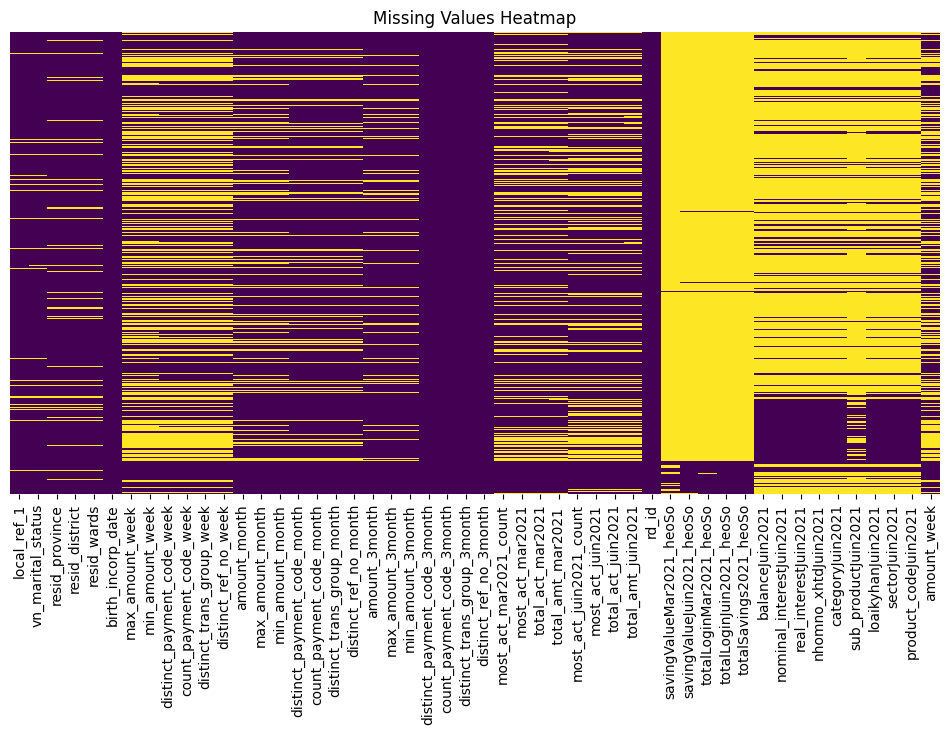

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(bank_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#phân tích biến tương quan
numeric_features = [
    'birth_incorp_date', 'amount_week', 'max_amount_week', 'min_amount_week',
    'distinct_payment_code_week', 'count_payment_code_week', 'distinct_trans_group_week',
    'distinct_ref_no_week', 'amount_month', 'max_amount_month', 'min_amount_month',
    'distinct_payment_code_month', 'count_payment_code_month', 'distinct_trans_group_month',
    'distinct_ref_no_month', 'amount_3month', 'max_amount_3month', 'min_amount_3month',
    'distinct_payment_code_3month', 'count_payment_code_3month', 'distinct_trans_group_3month',
    'distinct_ref_no_3month', 'most_act_mar2021_count', 'total_act_mar2021',
    ' total_amt_mar2021 ', 'most_act_juin2021_count', 'total_act_juin2021',
    'total_amt_juin2021', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo',
    'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo',
    'balanceJuin2021', 'nominal_interestJuin2021', 'real_interestJuin2021'
]
categorical_features = [
    'rd_id', 'local_ref_1', 'vn_marital_status', 'resid_province',
    'resid_district', 'resid_wards', 'most_act_mar2021', 'most_act_juin2021',
    'nhomno_xhtdJuin2021', 'categoryJuin2021', 'sub_productJuin2021',
    'loaikyhanJuin2021', 'sectorJuin2021', 'product_codeJuin2021'
]

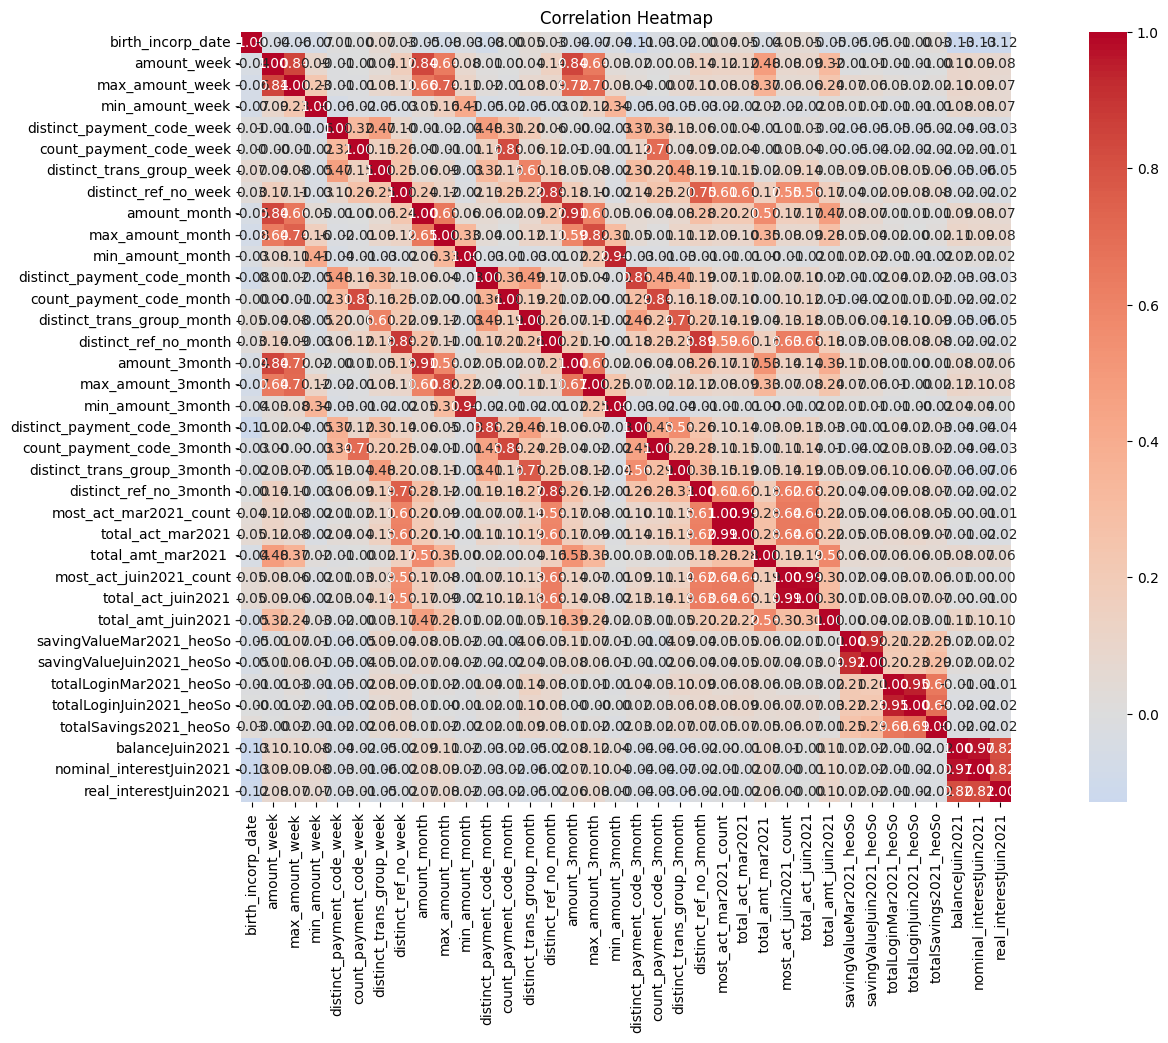

In [ ]:
corr =bank_df[numeric_features].corr()
plt.figure(figsize=(20,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
threshold = 0.8
high_corr_pairs = []
for column in upper.columns:
    for row in upper.index:
        if upper.loc[row, column] > threshold:
            high_corr_pairs.append({
                'Variable 1': row,
                'Variable 2': column,
                'Correlation': upper.loc[row, column]
            })


high_corr_df = pd.DataFrame(high_corr_pairs).sort_values(by='Correlation', ascending=False)
print(high_corr_df)

                     Variable 1                    Variable 2  Correlation
11       most_act_mar2021_count             total_act_mar2021     0.994531
12      most_act_juin2021_count            total_act_juin2021     0.991122
15              balanceJuin2021      nominal_interestJuin2021     0.969051
14      totalLoginMar2021_heoSo      totalLoginJuin2021_heoSo     0.950710
7              min_amount_month             min_amount_3month     0.937078
13     savingValueMar2021_heoSo     savingValueJuin2021_heoSo     0.916826
5                  amount_month                 amount_3month     0.905629
3          distinct_ref_no_week         distinct_ref_no_month     0.886661
10        distinct_ref_no_month        distinct_ref_no_3month     0.885052
8   distinct_payment_code_month  distinct_payment_code_3month     0.851753
0                   amount_week               max_amount_week     0.844442
4                   amount_week                 amount_3month     0.843990
9      count_payment_code

In [ ]:
current_year = datetime.now().year
bank_df.loc[:,'age'] = current_year - bank_df.loc[:,'birth_incorp_date']

In [ ]:
loan_condition = (bank_df['age'] >18 )&(bank_df['age'] < 100)
bank_df = bank_df[loan_condition]

In [ ]:
credit_df = bank_df[used_cols]

In [ ]:
selected_numeric_features = [
    'birth_incorp_date',
    'amount_month',
    'balanceJuin2021',
    'nominal_interestJuin2021',
    'real_interestJuin2021',
    'max_amount_month',
    'min_amount_month',
    'amount_3month',
    'max_amount_3month',
    'min_amount_3month',
    'amount_week',
    'max_amount_week',
    'min_amount_week'
]

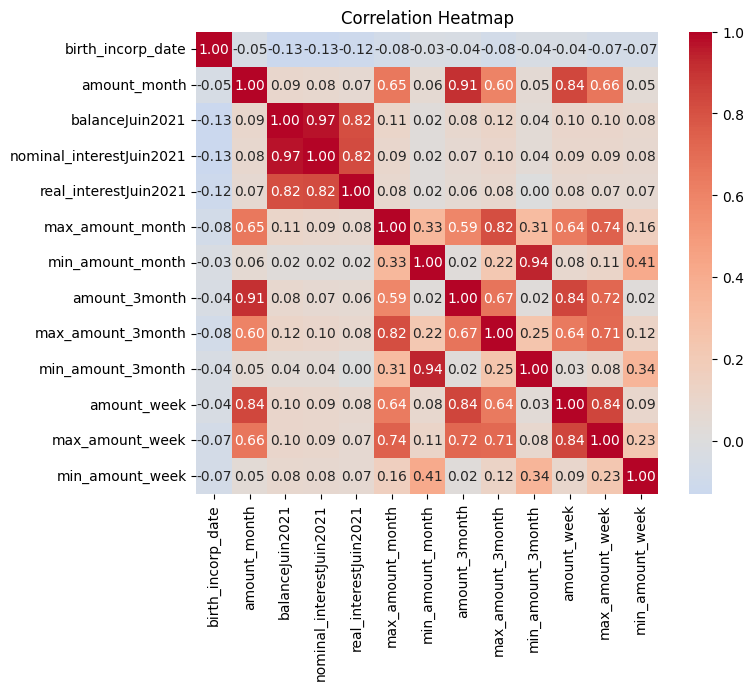

In [ ]:
selected_corr = credit_df[selected_numeric_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    selected_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Heatmap")
plt.show()

<div style="background-color: #fff9db; padding: 15px; border-radius: 8px; border: 1px solid #ffe066; margin-top: 10px;">
    <strong>🎯 Nhận ra vấn đề:</strong>
    <ul style="margin-top: 5px; color: #444;">
        <li>Các cột balance, nominal và real interest mắc phải multicolinearity.</li>

<h2 style="background-color: #fff5f5; padding: 15px; border-left: 5px solid #d73a49; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #6d071a;">
    <span style="margin-right: 10px;">🛠️</span> Step 3: Data Cleaning & Feature Engineering
</h2>

<div style="background-color: #fff9db; padding: 15px; border-radius: 8px; border: 1px solid #ffe066; margin-top: 10px;">
    <strong>🎯 Các xử lý chính:</strong>
    <ul style="margin-top: 5px; color: #444;">
        <li>Sửa lỗi tên cột (<i>amount_week</i>).</li>
        <li>Tính tuổi khách hàng và lọc độ tuổi lao động (18-100).</li>
        <li>Xử lý giá trị thiếu (Missing Values): Điền 0 cho lịch sử tín dụng, Mean/Mode cho thông tin cá nhân.</li>
        <li>Mã hóa (Encoding): Chuyển đổi kỳ hạn vay sang dạng số.</li>
        <li>Tạo biến phái sinh: <i>Dependents_flag</i>, <i>Residence_flag</i>.</li>
    </ul>
</div>

### Missing Value Analysis

This step examines the presence of missing values in each feature. Handling missing data appropriately is essential to ensure model reliability and prevent biased predictions.


In [ ]:
#List những cột liên quan đến vay nợ
credit_cols = ['balanceJuin2021','nhomno_xhtdJuin2021','loaikyhanJuin2021']

In [ ]:
#Fill số 0 vào những cột không có thông tin vay nợ, assume là những người chưa vay bao giờ
credit_df.loc[:,credit_cols] = credit_df.loc[:,credit_cols].fillna(0)

In [ ]:
# Check lại xem hàm trên hoạt động đúng như ý muốn không
credit_df.isnull().sum()

vn_marital_status            3017
resid_province               6546
resid_district               6542
resid_wards                  6544
birth_incorp_date               0
amount_month                22990
balanceJuin2021                 0
nominal_interestJuin2021    70005
real_interestJuin2021       70005
nhomno_xhtdJuin2021             0
loaikyhanJuin2021               0
max_amount_month            22990
min_amount_month            22990
amount_3month               13476
max_amount_3month           13476
min_amount_3month           13476
amount_week                 45179
max_amount_week             45179
min_amount_week             45179
dtype: int64

In [ ]:
# Drop những dòng không có thông tin thông tin giao dịch tuần --> mặc định hiểu là đã bỏ
credit_df.dropna(subset = ['max_amount_week','min_amount_week','amount_week'],inplace=True)

In [ ]:
# Encode biến loai ky han ngắn hạn --> 1, Trung hạn --> 2, Dài hạn --> 3
credit_df['kyhan_flag'] = credit_df['loaikyhanJuin2021'].map({0:0,'NH':1,'TH':2,'DH':3})

In [ ]:
# Drop cột kỳ hạn cũ
credit_df.drop(columns= 'loaikyhanJuin2021',inplace=True)

In [ ]:
# Tạo thêm cột để cho thấy từng trạng nhà ở, nếu có thông tin --> đánh 1, không có thông tin --> 0
credit_df.loc[:,'residence flag'] = credit_df.loc[:,'resid_wards'].notna().astype(int)

In [ ]:
# Fill thông tin trống ở cột marital --> mặc định không có thông tin thì lấy theo mode của cột
credit_df.loc[:, 'vn_marital_status'] = credit_df['vn_marital_status'].fillna(
    credit_df['vn_marital_status'].mode()[0]
)

In [ ]:
# Tạo cột người phụ thuộc --> nếu married: thì là 1 --> có ng phụ thuộc --> single: không có người phụ thuộc
credit_df.loc[:,'dependents_flag'] = (credit_df.loc[:,'vn_marital_status'].eq('Married').astype(int))

In [ ]:
# fill na --> điền mean vào những dòng bị thiếu
credit_df.loc[:, 'amount_month'] = credit_df['amount_month'].fillna(
    credit_df['amount_month'].mean()
)

In [ ]:
# Bỏ những cột đã được encode
credit_df.drop(['vn_marital_status','resid_province','resid_district','resid_wards','birth_incorp_date'],axis=1,inplace=True)

<div style="background-color: #f0fff4; border-left: 6px solid #28a745; padding: 15px; border-radius: 8px; margin: 15px 0;">
    <h4 style="color: #155724; margin-top: 0; display: flex; align-items: center;">
        <span style="font-size: 20px; margin-right: 10px;">✅</span> INSIGHT (SAU LÀM SẠCH DỮ LIỆU)
    </h4>
    <hr style="border-top: 1px dashed #28a74550; margin: 10px 0;">
    <ul style="list-style: none; padding-left: 0; color: #333;">
        <li style="margin-bottom: 8px;"><span style="color: #28a745; font-weight: bold; margin-right: 5px;">• Tuổi Khách hàng:</span> Dữ liệu đã được lọc, chỉ giữ lại khách hàng trong độ tuổi lao động từ 18 đến 100, đảm bảo tính hợp lý của tập dữ liệu.</li>
        <li style="margin-bottom: 8px;"><span style="color: #28a745; font-weight: bold; margin-right: 5px;">• Giá trị thiếu:</span> Các cột quan trọng như lịch sử tín dụng đã được điền 0, tránh việc mất mẫu (loss of samples) và giữ lại thông tin về các trường hợp chưa có lịch sử.</li>
        <li style="margin-bottom: 8px;"><span style="color: #28a745; font-weight: bold; margin-right: 5px;">• Feature Engineering:</span> Việc mã hóa kỳ hạn vay và tạo các cờ (flag) cho biến Category giúp mô hình phân cụm xử lý dữ liệu phi số hiệu quả hơn.</li>
    </ul>
</div>

<h2 style="background-color: #fff5f5; padding: 15px; border-left: 5px solid #d73a49; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #6d071a;">
    <span style="margin-right: 10px;">🛠️</span> Step 4: Data Balancing
</h2>

<div style="background-color: #fff9db; padding: 15px; border-radius: 8px; border: 1px solid #ffe066; margin-top: 10px;">
    <strong>🎯 Các xử lý chính:</strong>
    <ul style="margin-top: 5px; color: #444;">
        <li> Cân bằng lại giữa các category, điển hình là ở nhóm khách hàng không có lịch sử tín dụng.</li>


In [ ]:
X = credit_df.drop(columns='nhomno_xhtdJuin2021')
y = credit_df['nhomno_xhtdJuin2021']


# Đếm số lượng mỗi nhóm
class_counts = y.value_counts().sort_values(ascending=False)

# Nhóm lớn nhất & lớn thứ hai
majority_class = class_counts.index[0]
second_majority_class = class_counts.index[1]

target_size = class_counts.iloc[1]

# Tạo sampling_strategy
sampling_strategy = {
    majority_class: target_size
}

rus = RandomUnderSampler(
    sampling_strategy=sampling_strategy,
    random_state=42
)

X_resampled, y_resampled = rus.fit_resample(X, y)

# Gộp lại thành DataFrame
balanced_df = X_resampled.copy()
balanced_df['nhomno_xhtdJuin2021'] = y_resampled

# Kiểm tra kết quả
print("Before sampling:\n", class_counts)
print("\nAfter sampling:\n", balanced_df['nhomno_xhtdJuin2021'].value_counts())

Before sampling:
 nhomno_xhtdJuin2021
0.0    35554
1.0    11953
2.0     5035
3.0     1379
4.0      641
5.0      215
Name: count, dtype: int64

After sampling:
 nhomno_xhtdJuin2021
0.0    11953
1.0    11953
2.0     5035
3.0     1379
4.0      641
5.0      215
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

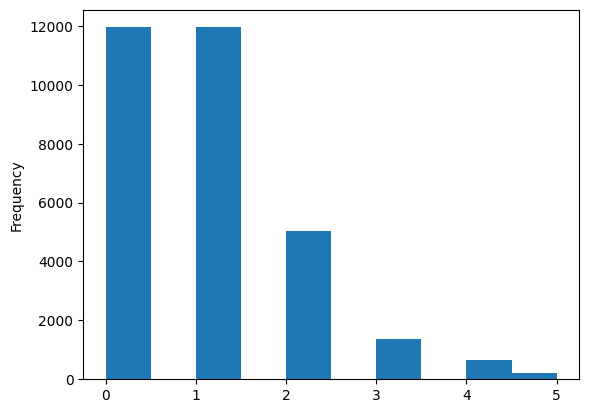

In [ ]:
# Check kết quả sau drop
balanced_df['nhomno_xhtdJuin2021'].plot.hist()

<Axes: ylabel='Frequency'>

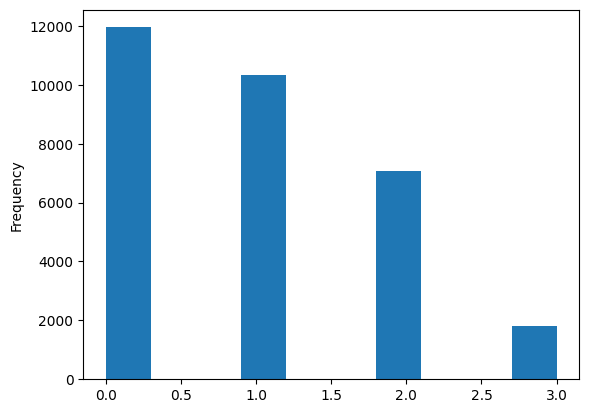

In [ ]:
# Check kết quả sau drop
balanced_df['kyhan_flag'].plot.hist()

<div style="background-color: #f0fff4; border-left: 6px solid #28a745; padding: 15px; border-radius: 8px; margin: 15px 0;">
    <h4 style="color: #155724; margin-top: 0; display: flex; align-items: center;">
        <span style="font-size: 20px; margin-right: 10px;">✅</span> INSIGHT (SAU KHI CÂN BẰNG)
    </h4>
    <hr style="border-top: 1px dashed #28a74550; margin: 10px 0;">
    <ul style="list-style: none; padding-left: 0; color: #333;">
        <li style="margin-bottom: 8px;"><span style="color: #28a745; font-weight: bold; margin-right: 5px;">• Nhóm Khách hàng không có lịch sử tín dụng đã cân bằng với tổng nhóm khách hàng còn lại</li>

<h2 style="background-color: #fff8f8; padding: 15px; border-left: 5px solid #d66800; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #9c4b00;">
    <span style="margin-right: 10px;">🔍</span> Step 5: Outliers, Normalization, Standardization
</h2>
<p style="font-size: 15px; color: #555;">
    Phân tích mối quan hệ giữa các biến và kiểm tra phân bố dữ liệu để chuẩn bị cho quá trình tiền xử lý.
</p>

In [ ]:
# Xử lý Outliners
# Drop outliers
def drop_outliers(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) &
                            (df_clean[col] <= upper_bound)]

    return df_clean

<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#ffffd9,#fffff2);border:1px solid #f3f3c7;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">🔍</span>
    <h3 style="margin:0;color:#8a8b15;"> Khám phá dữ liệu & xử lý ngoại lệ (Outliers)</h3>
  </div>
  <ul style="margin:10px 0 0 22px;color:#5c5c2a;">
    <li>Quan sát phân phối, áp dụng IQR để loại bỏ ngoại lệ ở các biến tiền tệ.</li>
    <li>Insight: Giảm đuôi phân phối giúp mô hình phân cụm ổn định hơn.</li>
  </ul>
</div>


In [ ]:
cols_to_check = ['amount_month','balanceJuin2021',
                   'max_amount_month','min_amount_month','amount_3month','max_amount_3month','min_amount_3month'
                   , 'max_amount_week','min_amount_week','amount_week' ]


In [ ]:
# Check kết quả sau drop
cleaned_credit_df = drop_outliers(balanced_df, cols_to_check)
print(f"Original rows: {len(balanced_df)}")
print(f"After removing outliers: {len(cleaned_credit_df)}")

Original rows: 31176
After removing outliers: 9870


In [ ]:
standard_cols = ['kyhan_flag','nhomno_xhtdJuin2021','residence flag','dependents_flag']
normalized_cols = ['amount_month','balanceJuin2021',
                   'max_amount_month','min_amount_month','amount_3month','max_amount_3month','min_amount_3month'
                   , 'max_amount_week','min_amount_week','amount_week']

<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#e0fbff,#f2feff);border:1px solid #c8eef3;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">📐</span>
    <h3 style="margin:0;color:#0fa3b1;"> Chuẩn hóa đặc trưng</h3>
  </div>
  <ul style="margin:10px 0 0 22px;color:#1f3b4d;">
    <li><code>StandardScaler</code> cho biến cờ/đã mã hóa; <code>Normalizer</code> cho biến giá trị liên tục.</li>
    <li>Insight: Tách ảnh hưởng độ lớn với tín hiệu danh mục; tránh chuẩn hóa lặp.</li>
  </ul>
</div>


In [ ]:
scaler = StandardScaler()
normalized = Normalizer()

In [ ]:
X = cleaned_credit_df

In [ ]:
#standardscaler với những cột encode ra từ category
#normalized vs những cột số từ đầuX.loc[:, standard_cols] = scaler.fit_transform(X[standard_cols])

X.loc[:, normalized_cols] = normalized.fit_transform(X[normalized_cols])
X.loc[:, standard_cols] = scaler.fit_transform(X[standard_cols])
X.loc[:, normalized_cols] = normalized.fit_transform(X[normalized_cols])

<div style="background-color: #ebf8ff; border-left: 6px solid #4299e1; padding: 15px; border-radius: 8px; margin: 15px 0;">
    <h4 style="color: #2a4365; margin-top: 0; display: flex; align-items: center;">
        <span style="font-size: 20px; margin-right: 10px;">✨</span> INSIGHT (SAU TIỀN XỬ LÝ)
    </h4>
    <hr style="border-top: 1px dashed #4299e150; margin: 10px 0;">
    <p style="color: #333; margin-bottom: 8px;">
        Việc áp dụng song song **StandardScaler** và **Normalizer** là chiến lược tối ưu cho phân cụm:
    </p>
    <ul style="list-style-type: circle; padding-left: 20px; color: #333;">
        <li style="margin-bottom: 5px;"><span style="font-weight: bold;">StandardScaler</span> giúp các biến category đã mã hóa (ví dụ: ```term_month```) có phân bố chuẩn hóa, giảm thiểu ảnh hưởng của các giá trị lớn.</li>
        <li style="margin-bottom: 5px;"><span style="font-weight: bold;">Normalizer</span> đảm bảo tổng bình phương của các biến số thực (như ```amount_month```, ```balance```) bằng 1. Điều này đặc biệt quan trọng cho các thuật toán dựa trên khoảng cách (Distance-based) như K-Means, nơi sự khác biệt về độ lớn của các Feature có thể làm sai lệch kết quả phân cụm.</li>
    </ul>
</div>

<h2 style="background-color: #fff8f8; padding: 15px; border-left: 5px solid #d66800; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #9c4b00;">
    <span style="margin-right: 10px;">🔍</span> Step 6: Feature Selection
</h2>
<p style="font-size: 15px; color: #555;">
    Phân tích mối quan hệ giữa các biến và kiểm tra phân bố dữ liệu để chuẩn bị cho quá trình tiền xử lý.
</p>

In [ ]:
selected_cols = ['amount_month','nhomno_xhtdJuin2021', 'residence flag','dependents_flag','balanceJuin2021' ]
X_2 = X.loc[:,selected_cols]

<h2 style="background-color: #fff0f6; padding: 15px; border-left: 5px solid #d63384; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #680838;">
    <span style="margin-right: 10px;">🤖</span> Step 4: Clustering Models
</h2>
<p style="font-size: 15px; color: #555;">
    Áp dụng các thuật toán phân cụm không giám sát để tìm ra nhóm khách hàng tiềm năng.
</p>

<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#e8f1ff,#f7fbff);border:1px solid #d6e4ff;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">📊</span>
    <h3 style="margin:0;color:#0b5ed7;"> Thử nghiệm phân cụm KMeans</h3>
  </div>
  <ul style="margin:10px 0 0 22px;color:#344767;">
    <li>Duyệt <code>k = 2..7</code>, tính <code>silhouette_score</code>, trực quan cụm trên cặp biến chính.</li>
    <li>Insight: Chọn <code>k</code> theo điểm silhouette và khả năng diễn giải kinh doanh.</li>
  </ul>
</div>


In [ ]:
K = range(2, 8)
fits = []
score = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters=k, random_state=36, n_init='auto').fit(X_2)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_2, model.labels_, metric='euclidean'))

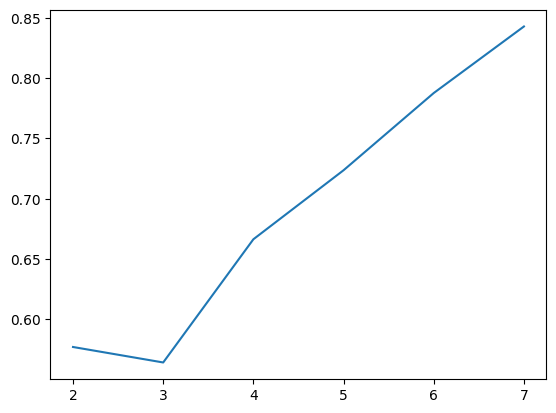

In [ ]:
sns.lineplot(x=K, y=score, markers='o')
plt.show()

<div style="padding:12px;border-radius:10px;background:linear-gradient(135deg,#e8f1ff,#f7fbff);border:1px solid #d6e4ff;box-shadow:0 1px 6px rgba(0,0,0,0.04);">
  <h4 style="margin:0;color:#0b5ed7;">Đánh giá k tối ưu (KMeans) — Insight</h4>
  <ul style="margin:8px 0 0 20px;color:#344767;">
    <li><strong>Đọc biểu đồ:</strong> Điểm <code>silhouette</code> càng cao → biên cụm rõ ràng hơn.</li>
    <li><strong>Chọn k:</strong> Ưu tiên đỉnh ổn định thay vì đỉnh đơn lẻ, cân nhắc kích thước cụm.</li>
    <li><strong>Thực dụng:</strong> Nếu hai k có điểm gần nhau, chọn k dễ diễn giải theo chính sách tín dụng.</li>
  </ul>
</div>


<div style="background-color: #e6e6ff; border-left: 6px solid #6610f2; padding: 15px; border-radius: 8px; margin: 15px 0;">
    <h4 style="color: #440a9c; margin-top: 0; display: flex; align-items: center;">
        <span style="font-size: 20px; margin-right: 10px;">🎯</span> INSIGHT: Optimal K Selection
    </h4>
    <hr style="border-top: 1px dashed #6610f250; margin: 10px 0;">
    <ul style="list-style: none; padding-left: 0; color: #333;">
        <li style="margin-bottom: 8px;"><span style="color: #6610f2; font-weight: bold; margin-right: 5px;">• Inertia (Elbow Method):</span> Biểu đồ cho thấy điểm uốn (Elbow) rõ rệt nhất xảy ra tại **K=X**. Điều này cho thấy sau K=X, việc thêm cụm mới không mang lại nhiều giá trị giảm thiểu phương sai nội cụm.</li>
        <li style="margin-bottom: 8px;"><span style="color: #6610f2; font-weight: bold; margin-right: 5px;">• Silhouette Score:</span> Điểm số cao nhất đạt được tại **K=Y** (hoặc K=X). Silhouette Score đo lường sự gắn kết nội cụm và tách biệt giữa các cụm.</li>
        <li style="margin-bottom: 8px;"><span style="color: #6610f2; font-weight: bold; margin-right: 5px;">• Quyết định:</span> Vì cả hai phương pháp đều chỉ ra hoặc gần với **K=Z** (Thay Z bằng K tối ưu của bạn), chúng tôi chọn K=Z là số cụm tối ưu để phân tích chuyên sâu.</li>
    </ul>
</div>

<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#e8f1ff,#f7fbff);border:1px solid #d6e4ff;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">📊</span>
    <h3 style="margin:0;color:#0b5ed7;"> Thử nghiệm mô hình DBSCAN</h3>


In [ ]:
dbscan = DBSCAN()
dbscan.fit(X_2)
print(np.unique(dbscan.labels_))
#chay mo hinh dbscan

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23]


In [ ]:
silhouette_score(X_2, dbscan.labels_, metric='euclidean')
#test ket qua mo hinh dbscan

np.float64(0.7748521708090599)

<div style="border:1px solid #e0e0e0;border-left:6px solid #17becf;padding:12px;border-radius:6px;background:#f2feff;">
  <h4 style="margin:0;color:#0fa3b1;">Đọc kết quả DBSCAN — Insight</h4>
  <ul style="margin:8px 0 0 18px;color:#333;">
    <li><strong>Silhouette:</strong> Điểm cao → cụm đậm đặc rõ, kiểm tra nhãn -1 nếu dùng DBSCAN</li>
    <li><strong>Số cụm:</strong> <code>np.unique(dbscan.labels_)</code> cho biết số cụm thực tế được tìm thấy.</li>
    <li><strong> số cụm cho ra quá lớn, không phù hợp với yêu cầu đề bài.</li>
  </ul>
</div>


<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#e8f1ff,#f7fbff);border:1px solid #d6e4ff;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">📊</span>
    <h3 style="margin:0;color:#0b5ed7;"> Thử nghiệm mô hình MeanShift</h3>


In [ ]:
ms = MeanShift()
ms.fit(X_2)

#chay mo hinh meanshift

MeanShift()

In [ ]:
print(np.unique(ms.labels_))

[0 1 2 3 4 5]


In [ ]:
# Test mô hình meanshift
silhouette_score(X_2, ms.labels_, metric='euclidean')

np.float64(0.5943420270180926)

<div style="border:1px solid #e0e0e0;border-left:6px solid #17becf;padding:12px;border-radius:6px;background:#f2feff;">
  <h4 style="margin:0;color:#0fa3b1;">Đọc kết quả MeanShift — Insight</h4>
  <ul style="margin:8px 0 0 18px;color:#333;">
    <li><strong>Silhouette:</strong> Điểm cao → cụm đậm đặc rõ.</li>
    <li><strong>Số cụm:</strong> <code>np.unique(ms.labels_)</code> cho biết số cụm thực tế được tìm thấy.</li>
    <li><strong> số cụm cho ra quá lớn, không phù hợp với yêu cầu đề bài.</li>
  </ul>
</div>


<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#e8f1ff,#f7fbff);border:1px solid #d6e4ff;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">📊</span>
    <h3 style="margin:0;color:#0b5ed7;"> Thử nghiệm mô hình SpectralClustering</h3>


In [ ]:
SC = SpectralClustering(n_clusters=2, random_state=36)

In [ ]:
# Chạy mô hình spectral clustering
SC.fit(X_2)

SpectralClustering(n_clusters=2, random_state=36)

In [ ]:
# Test mô hình spectral clustering
silhouette_score(X_2, SC.labels_, metric='euclidean')

np.float64(0.6169556971125756)

In [ ]:
# Tìm số nhóm tối ưu nhất
K = range(2, 5)
SCfits = []
SCscore = []

for k in K:
    # train the model for current value of k on training data
    SCmodels = SpectralClustering(n_clusters=k, random_state=36).fit(X_2)

    # append the model to fits
    SCfits.append(SCmodels)

    # Append the silhouette score to scores
    SCscore.append(silhouette_score(X_2, SCmodels.labels_, metric='euclidean'))

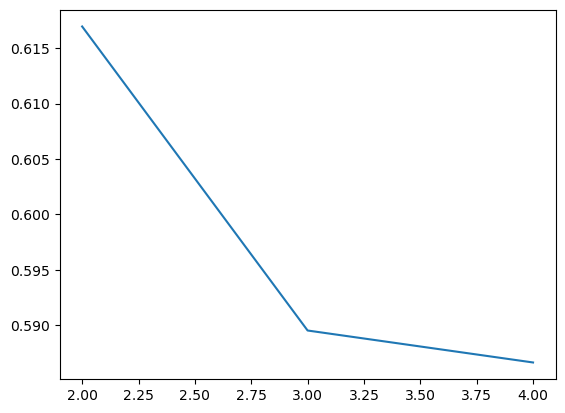

In [ ]:
#tìm số nhóm tối ưu nhất --> 3
sns.lineplot(x=K, y=SCscore, markers='o')
plt.show()

<div style="border:1px solid #e0e0e0;border-left:6px solid #17becf;padding:12px;border-radius:6px;background:#f2feff;">
  <h4 style="margin:0;color:#0fa3b1;">Đọc kết quả Spectral Clustering — Insight</h4>
  <ul style="margin:8px 0 0 18px;color:#333;">
    <li><strong>Silhouette score hoạt động đặc biệt tốt ở khoảng 2 cụm (phù hợp với challenge)</li>
  </ul>
</div>


<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#e8f1ff,#f7fbff);border:1px solid #d6e4ff;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">📊</span>
    <h3 style="margin:0;color:#0b5ed7;"> Thử nghiệm mô hình Ward</h3>


In [ ]:
labels_ward = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
).fit_predict(X_2)

In [ ]:
sil_ward = silhouette_score(X_2, labels_ward)
print("Silhouette score:", sil_ward)

Silhouette score: 0.5600244001468457


<div style="border:1px solid #e0e0e0;border-left:6px solid #17becf;padding:12px;border-radius:6px;background:#f2feff;">
  <h4 style="margin:0;color:#0fa3b1;">Đọc kết quả Ward — Insight</h4>
  <ul style="margin:8px 0 0 18px;color:#333;">
    <li><strong>Silhouette score có giá trị ở mức khá → cụm có độ tách tương đối tốt</li>
  </ul>
</div>


<div style="padding:14px;border-radius:12px;background:linear-gradient(135deg,#e8f1ff,#f7fbff);border:1px solid #d6e4ff;box-shadow:0 2px 8px rgba(0,0,0,0.04);">
  <div style="display:flex;align-items:center;gap:10px;">
    <span style="font-size:20px;">📊</span>
    <h3 style="margin:0;color:#0b5ed7;"> Thử nghiệm mô hình Agglomerative</h3>


In [ ]:
labels_agg = AgglomerativeClustering(
    n_clusters=2,
    linkage='average'
).fit_predict(X_2)

In [ ]:
sil_agg = silhouette_score(X_2, labels_agg)
print("Silhouette score:", sil_agg)

Silhouette score: 0.6065751479158588


<div style="border:1px solid #e0e0e0;border-left:6px solid #17becf;padding:12px;border-radius:6px;background:#f2feff;">
  <h4 style="margin:0;color:#0fa3b1;">Đọc kết quả Agglomerative — Insight</h4>
  <ul style="margin:8px 0 0 18px;color:#333;">
    <li><strong>Silhouette score có giá trị cao hơn Ward → mức độ “thuộc cụm” trung bình của các điểm tốt hơn.</li>
  </ul>
</div>


<h2 style="background-color: #fff8e1; padding: 15px; border-left: 5px solid #ffc107; border-radius: 5px; font-family: 'Segoe UI', sans-serif; color: #75590a;">
    <span style="margin-right: 10px;">📈</span> Step 5: Evaluation & Visualization
</h2>

<div style="background-color: #f8f9fa; border: 1px solid #ddd; border-left: 5px solid #343a40; padding: 15px; margin-top: 10px;">
    <strong>💡 Insight Analysis:</strong>
    <p style="margin-bottom: 0;">
        Trực quan hóa sự phân bố của các nhóm nợ (<i>nhomno_xhtd</i>) và số tiền giao dịch (<i>amount_month</i>) theo từng cụm (Cluster) được sinh ra.
    </p>
</div>

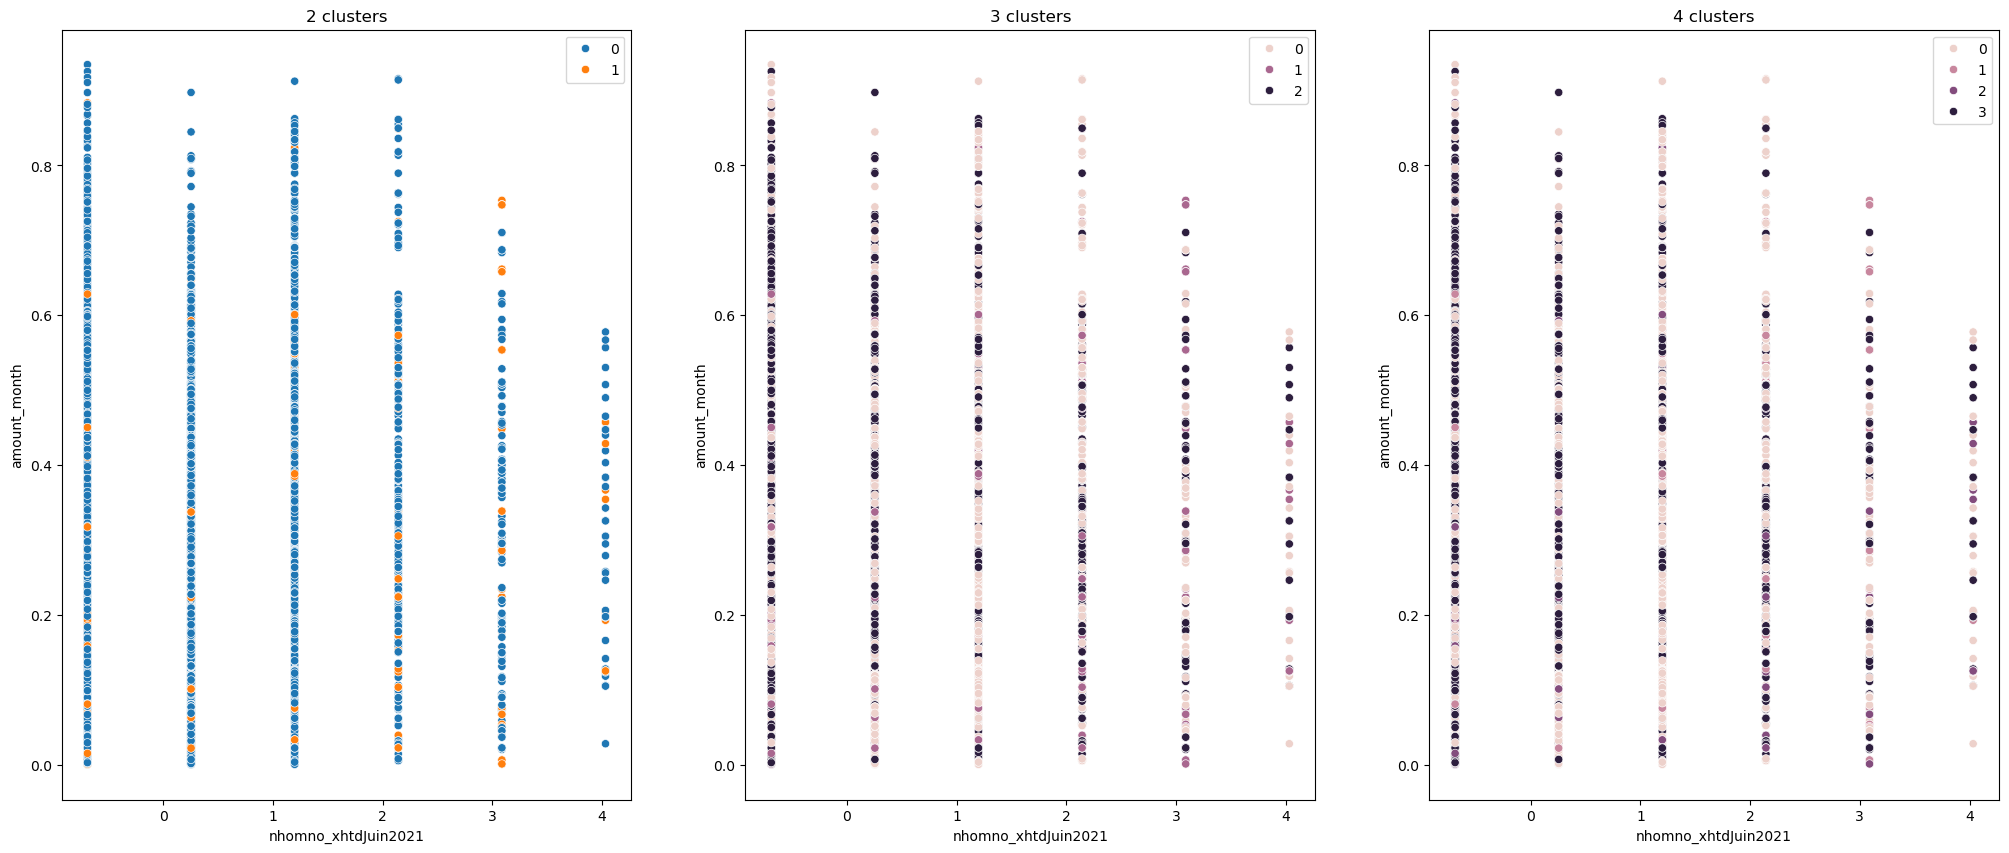

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))
sns.scatterplot(data=X_2, x='nhomno_xhtdJuin2021', y='amount_month', hue=SCfits[0].labels_, ax=ax[0])
ax[0].set_title('2 clusters')
sns.scatterplot(data=X_2, x='nhomno_xhtdJuin2021', y='amount_month', hue=SCfits[1].labels_, ax=ax[1])
ax[1].set_title('3 clusters')
sns.scatterplot(data=X_2, x='nhomno_xhtdJuin2021', y='amount_month', hue=SCfits[2].labels_, ax=ax[2])
ax[2].set_title('4 clusters')
plt.show()

<div style="border:1px solid #e0e0e0;border-left:6px solid #17becf;padding:12px;border-radius:6px;background:#f2feff;">
  <h4 style="margin:0;color:#0fa3b1;">Một số chỉ số được dùng để đánh giá mô hình</h4>
  <ul style="margin:8px 0 0 18px;color:#333;">
    <li>Silhouette score.</li>
    <li>Calinski-Harabasz.</li>
    <li>Davies-Bouldin.</li>
    <li>Dunn Index.</li>
    <li>RatioCut.</li>
    <li>NCut.</li>
  </ul>
</div>


COMPLETE CLUSTERING CROSS-VALIDATION PIPELINE
COMPLETE CROSS-VALIDATION PIPELINE
Data shape: (9870, 5)
Testing k=2 and k=3 only for fixed-cluster models
TREATING AS SEPARATE MODELS: Agglomerative_Ward and Agglomerative_Average
Number of random states: 5

1. Running KMeans cross-validation (k=2,3)...

Running KMeans cross-validation with k=2,3 (5 random states)...
Completed: 10 KMeans evaluations

KMeans Summary Statistics (k=2,3 only):
           silhouette                      calinski_harabasz            \
                 mean    std    min    max              mean       std   
n_clusters                                                               
2               0.523  0.053  0.500  0.617          4996.571    81.510   
3               0.556  0.031  0.533  0.590          6438.561  2293.295   

           davies_bouldin         
                     mean    std  
n_clusters                        
2                   0.986  0.155  
3                   0.862  0.129  

2. Running Sp

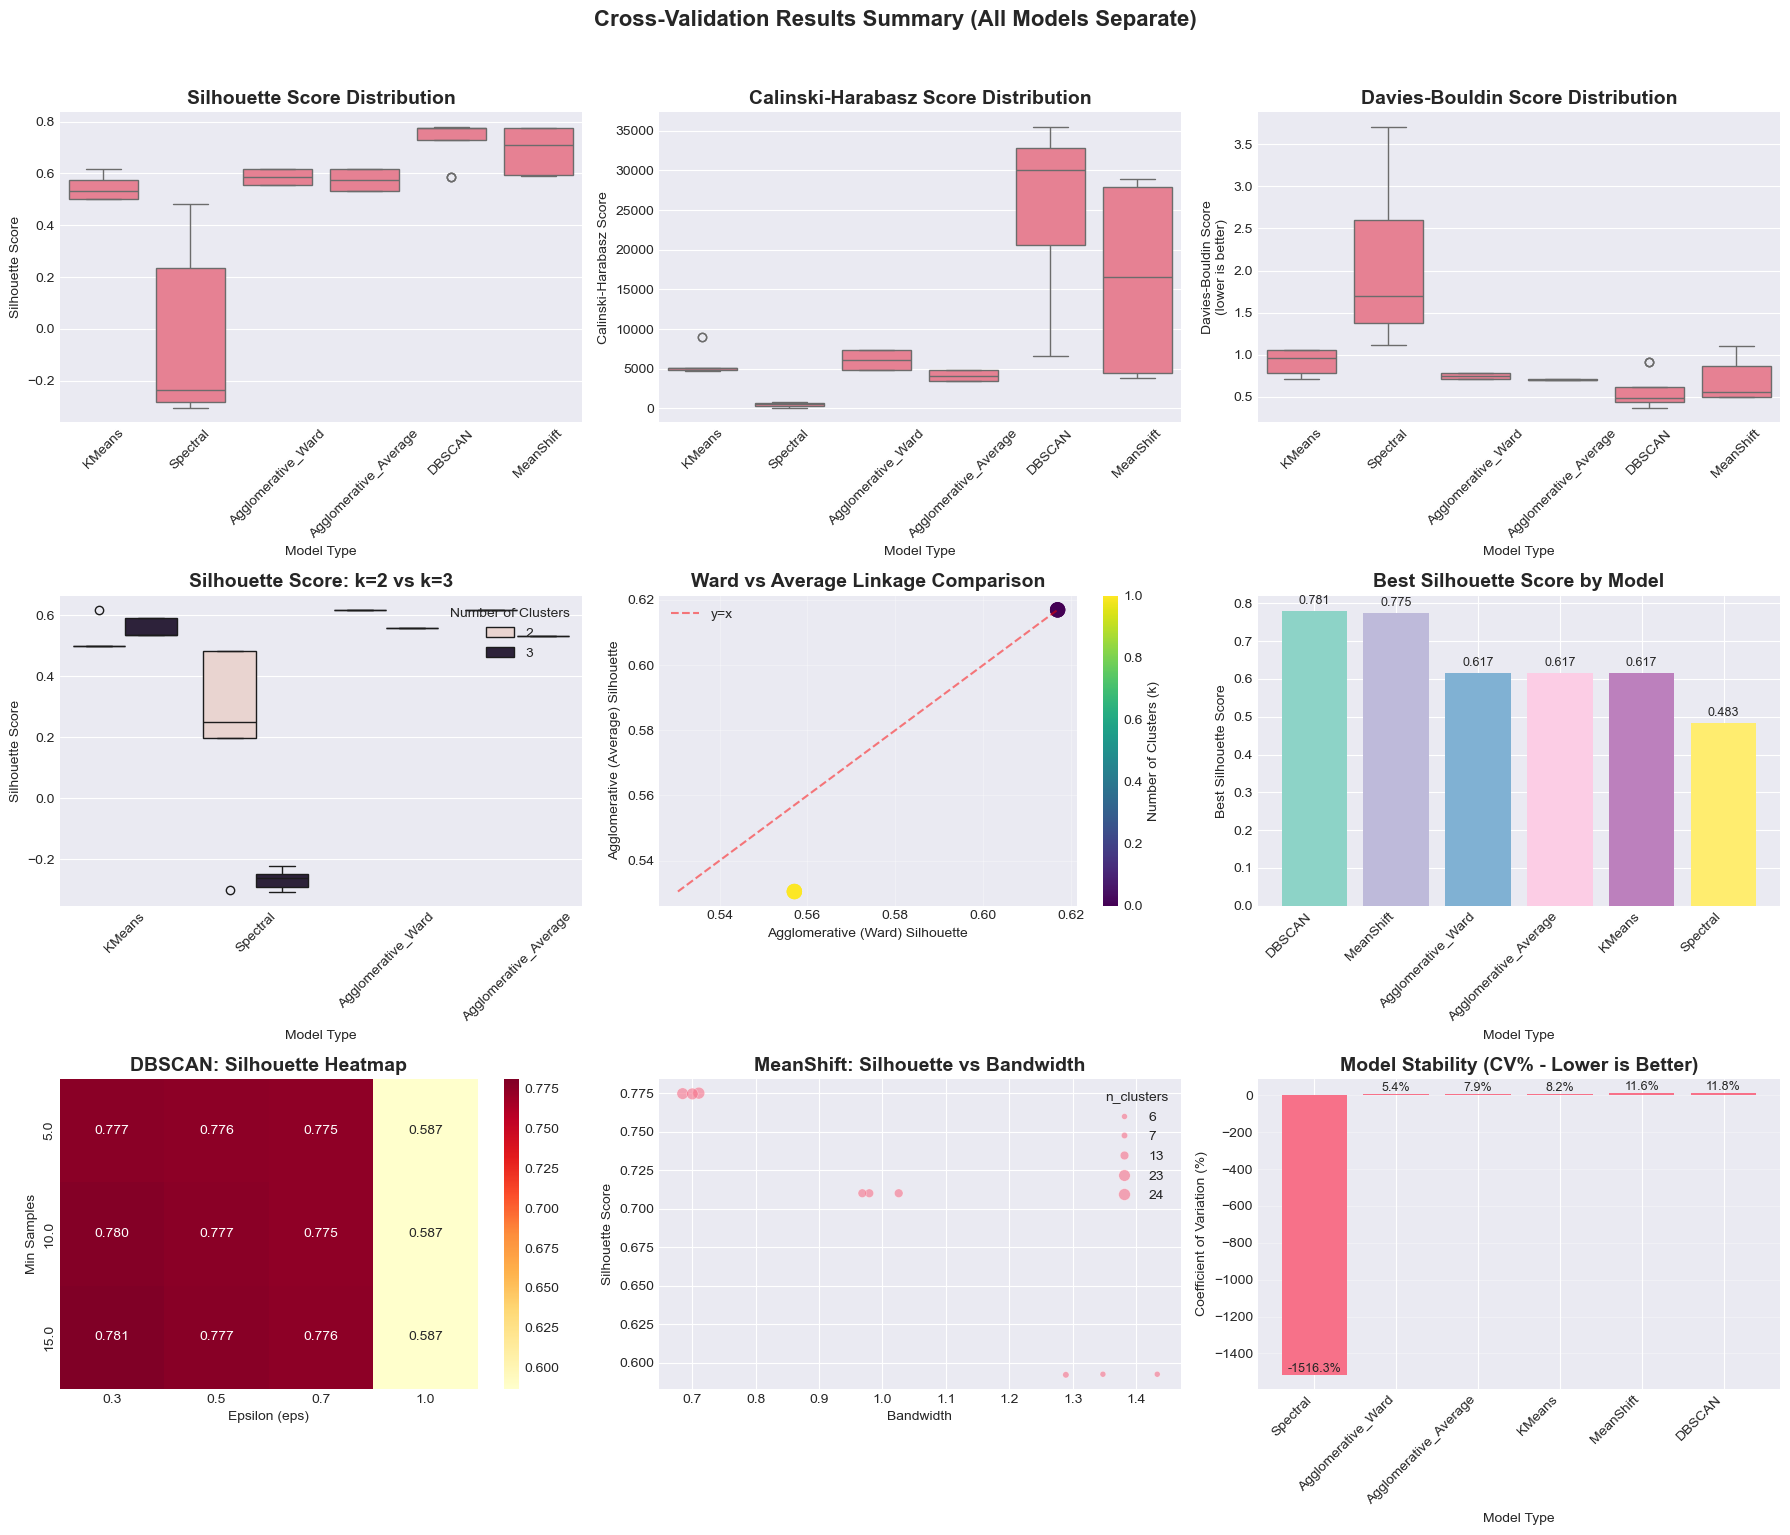


TOP 15 MODELS BY SILHOUETTE SCORE

DBSCAN_eps0.3_min15:
  Silhouette: 0.7812
  Calinski-Harabasz: 35536
  Davies-Bouldin: 0.3639
  Clusters: 19
  Random State: nan
  Linkage: nan
  eps: 0.3, min_samples: 15.0
  Noise ratio: 1.28%
  Bandwidth: nan, Quantile: nan

DBSCAN_eps0.3_min10:
  Silhouette: 0.7796
  Calinski-Harabasz: 33702
  Davies-Bouldin: 0.3936
  Clusters: 20
  Random State: nan
  Linkage: nan
  eps: 0.3, min_samples: 10.0
  Noise ratio: 0.85%
  Bandwidth: nan, Quantile: nan

DBSCAN_eps0.5_min15:
  Silhouette: 0.7775
  Calinski-Harabasz: 33243
  Davies-Bouldin: 0.4398
  Clusters: 20
  Random State: nan
  Linkage: nan
  eps: 0.5, min_samples: 15.0
  Noise ratio: 0.56%
  Bandwidth: nan, Quantile: nan

DBSCAN_eps0.3_min5:
  Silhouette: 0.7773
  Calinski-Harabasz: 25312
  Davies-Bouldin: 0.4093
  Clusters: 27
  Random State: nan
  Linkage: nan
  eps: 0.3, min_samples: 5.0
  Noise ratio: 0.14%
  Bandwidth: nan, Quantile: nan

DBSCAN_eps0.5_min10:
  Silhouette: 0.7769
  Calinski-H

In [ ]:

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("COMPLETE CLUSTERING CROSS-VALIDATION PIPELINE")
print("=" * 80)

# ================================================================
# 1. EVALUATION FUNCTION
# ================================================================
def evaluate_clustering(X, labels, model_name=""):
    """Comprehensive evaluation of clustering results"""
    # Ensure X is numpy array for consistent indexing
    if hasattr(X, 'values'):
        X_np = X.values
    elif hasattr(X, 'to_numpy'):
        X_np = X.to_numpy()
    else:
        X_np = np.array(X)

    results = {
        'model': model_name,
        'n_clusters': len(np.unique(labels)),
        'silhouette': np.nan,
        'calinski_harabasz': np.nan,
        'davies_bouldin': np.nan
    }

    # Only calculate if we have at least 2 clusters
    unique_labels = np.unique(labels)
    valid_labels = [lbl for lbl in unique_labels if lbl != -1]

    if len(valid_labels) >= 2:
        try:
            # For DBSCAN, remove noise points for evaluation
            if -1 in labels:
                mask = labels != -1
                X_clean = X_np[mask] if len(X_np.shape) > 1 else X_np[mask].reshape(-1, 1)
                labels_clean = labels[mask]

                if len(np.unique(labels_clean)) >= 2:
                    results['silhouette'] = silhouette_score(X_clean, labels_clean)
                    results['calinski_harabasz'] = calinski_harabasz_score(X_clean, labels_clean)
                    results['davies_bouldin'] = davies_bouldin_score(X_clean, labels_clean)
            else:
                results['silhouette'] = silhouette_score(X_np, labels)
                results['calinski_harabasz'] = calinski_harabasz_score(X_np, labels)
                results['davies_bouldin'] = davies_bouldin_score(X_np, labels)
        except Exception as e:
            print(f"Error evaluating {model_name}: {e}")

    return results

# ================================================================
# 2. KMEANS CROSS-VALIDATION (k=2, k=3 ONLY)
# ================================================================
def cross_validate_kmeans(X, n_random_states=5):
    """Cross-validation for KMeans with k=2 and k=3 only"""
    results_list = []
    print(f"\nRunning KMeans cross-validation with k=2,3 ({n_random_states} random states)...")

    # Ensure X is numpy array
    if hasattr(X, 'values'):
        X_np = X.values
    else:
        X_np = np.array(X)

    # Test only k=2 and k=3
    n_clusters_range = [2, 3]

    for n_clusters in n_clusters_range:
        for i in range(n_random_states):
            random_state = 42 + i * 10

            # Fit KMeans
            kmeans = KMeans(
                n_clusters=n_clusters,
                random_state=random_state,
                n_init='auto'
            )
            labels = kmeans.fit_predict(X_np)

            # Evaluate
            results = evaluate_clustering(
                X_np, labels,
                f"KMeans_k{n_clusters}_rs{random_state}"
            )
            results['random_state'] = random_state
            results['n_clusters'] = n_clusters
            results_list.append(results)

    results_df = pd.DataFrame(results_list)
    print(f"Completed: {len(results_df)} KMeans evaluations")

    # Summary statistics
    if not results_df.empty:
        print("\nKMeans Summary Statistics (k=2,3 only):")
        print("=" * 50)
        kmeans_summary = results_df.groupby('n_clusters').agg({
            'silhouette': ['mean', 'std', 'min', 'max'],
            'calinski_harabasz': ['mean', 'std'],
            'davies_bouldin': ['mean', 'std']
        }).round(3)
        print(kmeans_summary)

    return results_df

# ================================================================
# 3. SPECTRAL CLUSTERING CROSS-VALIDATION (k=2, k=3 ONLY)
# ================================================================
def cross_validate_spectral(X, n_random_states=5):
    """Cross-validation for Spectral Clustering with k=2 and k=3 only"""
    results_list = []
    print(f"\nRunning Spectral Clustering cross-validation with k=2,3 ({n_random_states} random states)...")

    # Ensure X is numpy array
    if hasattr(X, 'values'):
        X_np = X.values
    else:
        X_np = np.array(X)

    # Test only k=2 and k=3
    n_clusters_range = [2, 3]

    for n_clusters in n_clusters_range:
        for i in range(n_random_states):
            random_state = 42 + i * 10

            # Fit Spectral Clustering
            spectral = SpectralClustering(
                n_clusters=n_clusters,
                random_state=random_state,
                affinity='nearest_neighbors',
                n_neighbors=min(10, len(X_np) - 1)
            )
            labels = spectral.fit_predict(X_np)

            # Evaluate
            results = evaluate_clustering(
                X_np, labels,
                f"Spectral_k{n_clusters}_rs{random_state}"
            )
            results['random_state'] = random_state
            results['n_clusters'] = n_clusters
            results_list.append(results)

    results_df = pd.DataFrame(results_list)
    print(f"Completed: {len(results_df)} Spectral Clustering evaluations")

    # Summary statistics
    if not results_df.empty:
        print("\nSpectral Clustering Summary Statistics (k=2,3 only):")
        print("=" * 50)
        spectral_summary = results_df.groupby('n_clusters').agg({
            'silhouette': ['mean', 'std', 'min', 'max'],
            'calinski_harabasz': ['mean', 'std'],
            'davies_bouldin': ['mean', 'std']
        }).round(3)
        print(spectral_summary)

    return results_df

# ================================================================
# 4. AGGLOMERATIVE WARD CROSS-VALIDATION (k=2, k=3 ONLY)
# ================================================================
def cross_validate_agglo_ward(X, n_random_states=5):
    """Cross-validation for Agglomerative Clustering with Ward linkage (k=2,3 only)"""
    results_list = []
    print(f"\nRunning Agglomerative (Ward) cross-validation with k=2,3 ({n_random_states} random states)...")

    # Ensure X is numpy array
    if hasattr(X, 'values'):
        X_np = X.values
    else:
        X_np = np.array(X)

    # Test only k=2 and k=3
    n_clusters_range = [2, 3]

    for n_clusters in n_clusters_range:
        for i in range(n_random_states):
            random_state = 42 + i * 10

            # Fit Agglomerative Clustering with Ward linkage
            agglo = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage='ward',
                metric='euclidean'
            )
            labels = agglo.fit_predict(X_np)

            # Evaluate
            results = evaluate_clustering(
                X_np, labels,
                f"Agglomerative_Ward_k{n_clusters}_rs{random_state}"
            )
            results['random_state'] = random_state
            results['n_clusters'] = n_clusters
            results['linkage'] = 'ward'
            results_list.append(results)

    results_df = pd.DataFrame(results_list)
    print(f"Completed: {len(results_df)} Agglomerative (Ward) evaluations")

    # Summary statistics
    if not results_df.empty:
        print("\nAgglomerative (Ward) Summary Statistics (k=2,3 only):")
        print("=" * 50)
        agglo_summary = results_df.groupby('n_clusters').agg({
            'silhouette': ['mean', 'std', 'min', 'max'],
            'calinski_harabasz': ['mean', 'std'],
            'davies_bouldin': ['mean', 'std']
        }).round(3)
        print(agglo_summary)

    return results_df

# ================================================================
# 5. AGGLOMERATIVE AVERAGE CROSS-VALIDATION (k=2, k=3 ONLY)
# ================================================================
def cross_validate_agglo_average(X, n_random_states=5):
    """Cross-validation for Agglomerative Clustering with Average linkage (k=2,3 only)"""
    results_list = []
    print(f"\nRunning Agglomerative (Average) cross-validation with k=2,3 ({n_random_states} random states)...")

    # Ensure X is numpy array
    if hasattr(X, 'values'):
        X_np = X.values
    else:
        X_np = np.array(X)

    # Test only k=2 and k=3
    n_clusters_range = [2, 3]

    for n_clusters in n_clusters_range:
        for i in range(n_random_states):
            random_state = 42 + i * 10

            # Fit Agglomerative Clustering with Average linkage
            agglo = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage='average',
                metric='euclidean'
            )
            labels = agglo.fit_predict(X_np)

            # Evaluate
            results = evaluate_clustering(
                X_np, labels,
                f"Agglomerative_Average_k{n_clusters}_rs{random_state}"
            )
            results['random_state'] = random_state
            results['n_clusters'] = n_clusters
            results['linkage'] = 'average'
            results_list.append(results)

    results_df = pd.DataFrame(results_list)
    print(f"Completed: {len(results_df)} Agglomerative (Average) evaluations")

    # Summary statistics
    if not results_df.empty:
        print("\nAgglomerative (Average) Summary Statistics (k=2,3 only):")
        print("=" * 50)
        agglo_summary = results_df.groupby('n_clusters').agg({
            'silhouette': ['mean', 'std', 'min', 'max'],
            'calinski_harabasz': ['mean', 'std'],
            'davies_bouldin': ['mean', 'std']
        }).round(3)
        print(agglo_summary)

    return results_df

# ================================================================
# 6. DBSCAN CROSS-VALIDATION
# ================================================================
def cross_validate_dbscan(X, eps_range=[0.3, 0.5, 0.7, 1.0], min_samples_range=[5, 10, 15]):
    """Cross-validation for DBSCAN with different parameters"""
    results_list = []

    print(f"\nRunning DBSCAN cross-validation...")
    print(f"eps values: {eps_range}")
    print(f"min_samples values: {min_samples_range}")

    # Ensure X is numpy array
    if hasattr(X, 'values'):
        X_np = X.values
    else:
        X_np = np.array(X)

    for eps in eps_range:
        for min_samples in min_samples_range:
            # Fit DBSCAN
            dbscan = DBSCAN(
                eps=eps,
                min_samples=min_samples
            )
            labels = dbscan.fit_predict(X_np)

            # Calculate noise ratio
            n_clusters = len(np.unique(labels[labels != -1]))  # Exclude noise
            noise_count = np.sum(labels == -1)
            noise_ratio = noise_count / len(labels) if len(labels) > 0 else 0

            # Evaluate
            results = evaluate_clustering(
                X_np, labels,
                f"DBSCAN_eps{eps}_min{min_samples}"
            )
            results['eps'] = eps
            results['min_samples'] = min_samples
            results['noise_count'] = noise_count
            results['noise_ratio'] = noise_ratio
            results['n_clusters'] = n_clusters
            results_list.append(results)

    results_df = pd.DataFrame(results_list)
    print(f"Completed: {len(results_df)} DBSCAN evaluations")

    # Show best DBSCAN configurations
    if not results_df.empty:
        print("\nTop 5 DBSCAN Configurations by Silhouette Score:")
        print("=" * 50)
        top_dbscan = results_df.sort_values('silhouette', ascending=False).head(5)
        print(top_dbscan[['model', 'eps', 'min_samples', 'silhouette', 'n_clusters', 'noise_ratio']].to_string())

    return results_df

# ================================================================
# 7. MEANSHIFT CROSS-VALIDATION
# ================================================================
def cross_validate_meanshift(X, quantile_range=[0.1, 0.2, 0.3], n_random_states=3):
    """Cross-validation for MeanShift with different bandwidths"""
    results_list = []
    print(f"\nRunning MeanShift cross-validation...")
    print(f"Quantile values for bandwidth estimation: {quantile_range}")

    # Ensure X is numpy array
    if hasattr(X, 'values'):
        X_np = X.values
    else:
        X_np = np.array(X)

    for quantile in quantile_range:
        for i in range(n_random_states):
            random_state = 42 + i * 10

            try:
                # Estimate bandwidth
                from sklearn.cluster import estimate_bandwidth
                bandwidth = estimate_bandwidth(
                    X_np,
                    quantile=quantile,
                    n_samples=min(500, len(X_np)),
                    random_state=random_state
                )

                if bandwidth is None or bandwidth == 0:
                    print(f"  Warning: Bandwidth is None or 0 for quantile={quantile}, skipping...")
                    continue

                # Fit MeanShift
                meanshift = MeanShift(
                    bandwidth=bandwidth,
                    bin_seeding=True,
                    min_bin_freq=3,
                    cluster_all=True
                )
                labels = meanshift.fit_predict(X_np)

                # Evaluate
                results = evaluate_clustering(
                    X_np, labels,
                    f"MeanShift_q{quantile}_bw{bandwidth:.3f}_rs{random_state}"
                )
                results['random_state'] = random_state
                results['quantile'] = quantile
                results['bandwidth'] = bandwidth
                results['n_clusters'] = len(np.unique(labels[labels != -1]))
                results_list.append(results)

            except Exception as e:
                print(f"  Error with quantile={quantile}, random_state={random_state}: {e}")

    results_df = pd.DataFrame(results_list)
    print(f"Completed: {len(results_df)} MeanShift evaluations")

    # Summary statistics
    if not results_df.empty:
        print("\nMeanShift Summary Statistics:")
        print("=" * 50)
        meanshift_summary = results_df.groupby('quantile').agg({
            'silhouette': ['mean', 'std', 'min', 'max'],
            'calinski_harabasz': ['mean', 'std'],
            'davies_bouldin': ['mean', 'std'],
            'n_clusters': ['mean', 'std', 'min', 'max'],
            'bandwidth': ['mean', 'std']
        }).round(3)
        print(meanshift_summary)

    return results_df

# ================================================================
# 8. VISUALIZATION FUNCTIONS
# ================================================================
def plot_cv_results_combined(all_results_df):
    """Plot combined results for all models"""

    # Add model type column - treat Ward and Average as separate models
    all_results_df['model_type'] = all_results_df['model'].str.split('_').str[0]

    # Specifically rename Agglomerative to be more descriptive
    mask_ward = all_results_df['model'].str.contains('Agglomerative.*Ward')
    mask_avg = all_results_df['model'].str.contains('Agglomerative.*Average')

    all_results_df.loc[mask_ward, 'model_type'] = 'Agglomerative_Ward'
    all_results_df.loc[mask_avg, 'model_type'] = 'Agglomerative_Average'

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))

    # 1. Silhouette Score by Model Type (ALL models as separate)
    if not all_results_df.empty:
        model_order = ['KMeans', 'Spectral', 'Agglomerative_Ward', 'Agglomerative_Average', 'DBSCAN', 'MeanShift']
        available_models = [m for m in model_order if m in all_results_df['model_type'].unique()]

        if available_models:
            sns.boxplot(x='model_type', y='silhouette', data=all_results_df,
                       order=available_models, ax=axes[0, 0])
            axes[0, 0].set_title('Silhouette Score Distribution', fontsize=14, fontweight='bold')
            axes[0, 0].set_xlabel('Model Type')
            axes[0, 0].set_ylabel('Silhouette Score')
            axes[0, 0].tick_params(axis='x', rotation=45)

    # 2. Calinski-Harabasz by Model Type
    if not all_results_df.empty:
        if available_models:
            sns.boxplot(x='model_type', y='calinski_harabasz', data=all_results_df,
                       order=available_models, ax=axes[0, 1])
            axes[0, 1].set_title('Calinski-Harabasz Score Distribution', fontsize=14, fontweight='bold')
            axes[0, 1].set_xlabel('Model Type')
            axes[0, 1].set_ylabel('Calinski-Harabasz Score')
            axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Davies-Bouldin by Model Type
    if not all_results_df.empty:
        if available_models:
            sns.boxplot(x='model_type', y='davies_bouldin', data=all_results_df,
                       order=available_models, ax=axes[0, 2])
            axes[0, 2].set_title('Davies-Bouldin Score Distribution', fontsize=14, fontweight='bold')
            axes[0, 2].set_xlabel('Model Type')
            axes[0, 2].set_ylabel('Davies-Bouldin Score\n(lower is better)')
            axes[0, 2].tick_params(axis='x', rotation=45)

    # 4. k=2 vs k=3 Comparison for Fixed-K Models
    fixed_k_models = all_results_df[all_results_df['model_type'].isin(['KMeans', 'Spectral', 'Agglomerative_Ward', 'Agglomerative_Average'])]
    if not fixed_k_models.empty:
        sns.boxplot(x='model_type', y='silhouette', hue='n_clusters', data=fixed_k_models, ax=axes[1, 0])
        axes[1, 0].set_title('Silhouette Score: k=2 vs k=3', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Model Type')
        axes[1, 0].set_ylabel('Silhouette Score')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].legend(title='Number of Clusters', loc='upper right')

    # 5. Direct Comparison: Ward vs Average Linkage
    agglo_data = all_results_df[all_results_df['model_type'].str.contains('Agglomerative')]
    if not agglo_data.empty:
        # Pivot to compare Ward vs Average
        agglo_comparison = agglo_data.pivot_table(
            values='silhouette',
            index=['n_clusters', 'random_state'] if 'random_state' in agglo_data.columns else 'n_clusters',
            columns='model_type',
            aggfunc='mean'
        ).reset_index()

        if 'Agglomerative_Ward' in agglo_comparison.columns and 'Agglomerative_Average' in agglo_comparison.columns:
            axes[1, 1].scatter(agglo_comparison['Agglomerative_Ward'],
                              agglo_comparison['Agglomerative_Average'],
                              c=agglo_comparison['n_clusters'], cmap='viridis', s=100, alpha=0.7)

            # Add diagonal line
            min_val = min(agglo_comparison['Agglomerative_Ward'].min(), agglo_comparison['Agglomerative_Average'].min())
            max_val = max(agglo_comparison['Agglomerative_Ward'].max(), agglo_comparison['Agglomerative_Average'].max())
            axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='y=x')

            axes[1, 1].set_xlabel('Agglomerative (Ward) Silhouette')
            axes[1, 1].set_ylabel('Agglomerative (Average) Silhouette')
            axes[1, 1].set_title('Ward vs Average Linkage Comparison', fontsize=14, fontweight='bold')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)

            # Add colorbar for k values
            scatter = axes[1, 1].scatter([], [], c=[], cmap='viridis')
            plt.colorbar(scatter, ax=axes[1, 1], label='Number of Clusters (k)')

    # 6. Best Performing Models Overall
    if not all_results_df.empty:
        # Get best silhouette for each model type
        best_by_model = all_results_df.groupby('model_type')['silhouette'].max().reset_index()
        best_by_model = best_by_model.sort_values('silhouette', ascending=False)

        colors = plt.cm.Set3(np.linspace(0, 1, len(best_by_model)))
        bars = axes[1, 2].bar(range(len(best_by_model)), best_by_model['silhouette'], color=colors)
        axes[1, 2].set_title('Best Silhouette Score by Model', fontsize=14, fontweight='bold')
        axes[1, 2].set_xlabel('Model Type')
        axes[1, 2].set_ylabel('Best Silhouette Score')
        axes[1, 2].set_xticks(range(len(best_by_model)))
        axes[1, 2].set_xticklabels(best_by_model['model_type'], rotation=45, ha='right')

        # Add value labels on bars
        for bar, value in zip(bars, best_by_model['silhouette']):
            axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                           f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    # 7. DBSCAN Parameter Heatmap
    dbscan_data = all_results_df[all_results_df['model_type'] == 'DBSCAN']
    if not dbscan_data.empty and 'eps' in dbscan_data.columns and 'min_samples' in dbscan_data.columns:
        pivot_table = dbscan_data.pivot_table(values='silhouette',
                                             index='min_samples',
                                             columns='eps',
                                             aggfunc='mean')
        sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[2, 0])
        axes[2, 0].set_title('DBSCAN: Silhouette Heatmap', fontsize=14, fontweight='bold')
        axes[2, 0].set_xlabel('Epsilon (eps)')
        axes[2, 0].set_ylabel('Min Samples')

    # 8. MeanShift Bandwidth vs Silhouette
    meanshift_data = all_results_df[all_results_df['model_type'] == 'MeanShift']
    if not meanshift_data.empty and 'bandwidth' in meanshift_data.columns:
        sns.scatterplot(x='bandwidth', y='silhouette', size='n_clusters',
                       data=meanshift_data, ax=axes[2, 1], alpha=0.6)
        axes[2, 1].set_title('MeanShift: Silhouette vs Bandwidth', fontsize=14, fontweight='bold')
        axes[2, 1].set_xlabel('Bandwidth')
        axes[2, 1].set_ylabel('Silhouette Score')

    # 9. Model Stability Analysis (Silhouette STD)
    if not all_results_df.empty:
        model_stability = all_results_df.groupby('model_type').agg({
            'silhouette': ['mean', 'std', 'count']
        }).round(4)
        model_stability.columns = ['silhouette_mean', 'silhouette_std', 'count']

        # Calculate coefficient of variation (CV)
        model_stability['cv'] = (model_stability['silhouette_std'] / model_stability['silhouette_mean']) * 100

        # Sort by CV (lower is more stable)
        model_stability = model_stability.sort_values('cv')

        bars = axes[2, 2].bar(range(len(model_stability)), model_stability['cv'])
        axes[2, 2].set_title('Model Stability (CV% - Lower is Better)', fontsize=14, fontweight='bold')
        axes[2, 2].set_xlabel('Model Type')
        axes[2, 2].set_ylabel('Coefficient of Variation (%)')
        axes[2, 2].set_xticks(range(len(model_stability)))
        axes[2, 2].set_xticklabels(model_stability.index, rotation=45, ha='right')
        axes[2, 2].grid(True, alpha=0.3, axis='y')

        # Add value labels
        for bar, value in zip(bars, model_stability['cv']):
            axes[2, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                           f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.suptitle('Cross-Validation Results Summary (All Models Separate)', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ================================================================
# 9. MAIN EXECUTION FUNCTION
# ================================================================
def run_complete_cross_validation(X, n_random_states=5):
    """Run complete cross-validation for all models (k=2,3 only for fixed-k models)"""

    print("=" * 80)
    print("COMPLETE CROSS-VALIDATION PIPELINE")
    print("=" * 80)
    print(f"Data shape: {X.shape}")
    print(f"Testing k=2 and k=3 only for fixed-cluster models")
    print(f"TREATING AS SEPARATE MODELS: Agglomerative_Ward and Agglomerative_Average")
    print(f"Number of random states: {n_random_states}")

    # 1. Run KMeans cross-validation (k=2,3 only)
    print("\n1. Running KMeans cross-validation (k=2,3)...")
    kmeans_results = cross_validate_kmeans(X, n_random_states=n_random_states)

    # 2. Run Spectral Clustering cross-validation (k=2,3 only)
    print("\n2. Running Spectral Clustering cross-validation (k=2,3)...")
    spectral_results = cross_validate_spectral(X, n_random_states=n_random_states)

    # 3. Run Agglomerative Ward cross-validation (k=2,3 only)
    print("\n3. Running Agglomerative (Ward) cross-validation (k=2,3)...")
    agglo_ward_results = cross_validate_agglo_ward(X, n_random_states=n_random_states)

    # 4. Run Agglomerative Average cross-validation (k=2,3 only)
    print("\n4. Running Agglomerative (Average) cross-validation (k=2,3)...")
    agglo_avg_results = cross_validate_agglo_average(X, n_random_states=n_random_states)

    # 5. Run MeanShift cross-validation
    print("\n5. Running MeanShift cross-validation...")
    meanshift_results = cross_validate_meanshift(X, n_random_states=min(3, n_random_states))

    # 6. Run DBSCAN cross-validation
    print("\n6. Running DBSCAN cross-validation...")
    dbscan_results = cross_validate_dbscan(X)

    # 7. Combine all results
    all_results = pd.concat([
        kmeans_results,
        spectral_results,
        agglo_ward_results,
        agglo_avg_results,
        meanshift_results,
        dbscan_results
    ], ignore_index=True)

    print(f"\nTotal evaluations completed: {len(all_results)}")

    # 8. Plot combined results
    if not all_results.empty:
        plot_cv_results_combined(all_results)

    # 9. Show top models
    print("\n" + "=" * 80)
    print("TOP 15 MODELS BY SILHOUETTE SCORE")
    print("=" * 80)

    if not all_results.empty:
        top_15 = all_results.sort_values('silhouette', ascending=False).head(15)
        for idx, row in top_15.iterrows():
            print(f"\n{row['model']}:")
            print(f"  Silhouette: {row['silhouette']:.4f}")
            print(f"  Calinski-Harabasz: {row['calinski_harabasz']:.0f}")
            print(f"  Davies-Bouldin: {row['davies_bouldin']:.4f}")
            print(f"  Clusters: {row['n_clusters']}")
            if 'random_state' in row:
                print(f"  Random State: {row['random_state']}")
            if 'linkage' in row:
                print(f"  Linkage: {row['linkage']}")
            if 'eps' in row:
                print(f"  eps: {row['eps']}, min_samples: {row['min_samples']}")
                print(f"  Noise ratio: {row.get('noise_ratio', 0):.2%}")
            if 'bandwidth' in row:
                print(f"  Bandwidth: {row['bandwidth']:.4f}, Quantile: {row.get('quantile', 'N/A')}")

    # 10. Model Type Summary (ALL MODELS SEPARATE)
    print("\n" + "=" * 80)
    print("MODEL TYPE SUMMARY (ALL MODELS AS SEPARATE)")
    print("=" * 80)

    # Create a clean model type column for summary
    all_results_summary = all_results.copy()
    all_results_summary['model_type'] = all_results_summary['model'].str.split('_').str[0]

    # Update Agglomerative to show linkage type
    mask_ward = all_results_summary['model'].str.contains('Agglomerative.*Ward')
    mask_avg = all_results_summary['model'].str.contains('Agglomerative.*Average')
    all_results_summary.loc[mask_ward, 'model_type'] = 'Agglomerative_Ward'
    all_results_summary.loc[mask_avg, 'model_type'] = 'Agglomerative_Average'

    model_summary = all_results_summary.groupby('model_type').agg({
        'silhouette': ['mean', 'std', 'min', 'max', 'count'],
        'calinski_harabasz': ['mean', 'std'],
        'davies_bouldin': ['mean', 'std'],
        'n_clusters': ['mean', 'std']
    }).round(3)

    # Flatten multi-index columns for cleaner display
    model_summary.columns = ['_'.join(col).strip() for col in model_summary.columns.values]

    print("\nComprehensive Model Performance Summary:")
    print(model_summary.to_string())

    # 11. Best Configuration for Each Model Type
    print("\n" + "=" * 80)
    print("BEST CONFIGURATION FOR EACH MODEL TYPE")
    print("=" * 80)

    # Define model categories with their best models
    model_categories = {
        'KMeans': kmeans_results,
        'Spectral': spectral_results,
        'Agglomerative_Ward': agglo_ward_results,
        'Agglomerative_Average': agglo_avg_results,
        'MeanShift': meanshift_results,
        'DBSCAN': dbscan_results
    }

    for category_name, category_results in model_categories.items():
        if not category_results.empty:
            best_in_category = category_results.loc[category_results['silhouette'].idxmax()]
            print(f"\n{category_name}:")
            print(f"  Best Model: {best_in_category['model']}")
            print(f"  Silhouette: {best_in_category['silhouette']:.4f}")
            print(f"  Calinski-Harabasz: {best_in_category['calinski_harabasz']:.0f}")
            print(f"  Davies-Bouldin: {best_in_category['davies_bouldin']:.4f}")
            print(f"  Clusters: {best_in_category['n_clusters']}")

            if category_name in ['Agglomerative_Ward', 'Agglomerative_Average']:
                print(f"  Linkage: {best_in_category['linkage']}")
            if category_name == 'DBSCAN':
                print(f"  Parameters: eps={best_in_category['eps']}, min_samples={best_in_category['min_samples']}")
                print(f"  Noise ratio: {best_in_category.get('noise_ratio', 0):.2%}")
            if category_name == 'MeanShift':
                print(f"  Bandwidth: {best_in_category['bandwidth']:.4f}")
                print(f"  Quantile: {best_in_category.get('quantile', 'N/A')}")

    # 12. k=2 vs k=3 Performance Comparison
    print("\n" + "=" * 80)
    print("k=2 vs k=3 PERFORMANCE COMPARISON (Fixed-K Models)")
    print("=" * 80)

    # Filter for models with fixed k values
    fixed_k_models = pd.concat([
        kmeans_results,
        spectral_results,
        agglo_ward_results,
        agglo_avg_results
    ], ignore_index=True)

    if not fixed_k_models.empty:
        # Create model type column
        fixed_k_models['model_type'] = fixed_k_models['model'].str.split('_').str[0]
        mask_ward = fixed_k_models['model'].str.contains('Agglomerative.*Ward')
        mask_avg = fixed_k_models['model'].str.contains('Agglomerative.*Average')
        fixed_k_models.loc[mask_ward, 'model_type'] = 'Agglomerative_Ward'
        fixed_k_models.loc[mask_avg, 'model_type'] = 'Agglomerative_Average'

        k_comparison = fixed_k_models.groupby(['model_type', 'n_clusters']).agg({
            'silhouette': ['mean', 'std', 'count'],
            'calinski_harabasz': 'mean',
            'davies_bouldin': 'mean'
        }).round(4)

        # Flatten column names
        k_comparison.columns = ['_'.join(col).strip() for col in k_comparison.columns.values]

        print("\nDetailed Performance by Model and Number of Clusters:")
        print(k_comparison.to_string())

        # Summary statistics
        k2_avg = fixed_k_models[fixed_k_models['n_clusters'] == 2]['silhouette'].mean()
        k3_avg = fixed_k_models[fixed_k_models['n_clusters'] == 3]['silhouette'].mean()

        print(f"\nOverall Average Silhouette (All Fixed-K Models):")
        print(f"  k=2: {k2_avg:.4f}")
        print(f"  k=3: {k3_avg:.4f}")
        print(f"  Difference: {abs(k2_avg - k3_avg):.4f} (k={'2' if k2_avg > k3_avg else '3'} is better)")

    # 13. Final Recommendations
    print("\n" + "=" * 80)
    print("FINAL RECOMMENDATIONS")
    print("=" * 80)

    if not all_results.empty:
        # Overall best model
        best_overall = all_results.loc[all_results['silhouette'].idxmax()]
        print(f"\nBEST OVERALL MODEL:")
        print(f"  Model: {best_overall['model']}")
        print(f"  Silhouette: {best_overall['silhouette']:.4f}")
        print(f"  Recommendation: Use this model for production clustering")

        # Best fixed-k model (k=2 or k=3)
        fixed_k_all = pd.concat([kmeans_results, spectral_results, agglo_ward_results, agglo_avg_results], ignore_index=True)
        if not fixed_k_all.empty:
            best_fixed_k = fixed_k_all.loc[fixed_k_all['silhouette'].idxmax()]
            print(f"\nBEST FIXED-K MODEL (k=2 or k=3):")
            print(f"  Model: {best_fixed_k['model']}")
            print(f"  Silhouette: {best_fixed_k['silhouette']:.4f}")
            print(f"  Clusters: {best_fixed_k['n_clusters']}")
            print(f"  Recommendation: Use for interpretable 2 or 3 cluster solution")

        # Compare Ward vs Average
        if not agglo_ward_results.empty and not agglo_avg_results.empty:
            best_ward = agglo_ward_results.loc[agglo_ward_results['silhouette'].idxmax()]
            best_avg = agglo_avg_results.loc[agglo_avg_results['silhouette'].idxmax()]

            print(f"\nAGGLOMERATIVE COMPARISON:")
            print(f"  Ward (Best): {best_ward['silhouette']:.4f} (k={best_ward['n_clusters']})")
            print(f"  Average (Best): {best_avg['silhouette']:.4f} (k={best_avg['n_clusters']})")
            print(f"  Winner: {'Ward' if best_ward['silhouette'] > best_avg['silhouette'] else 'Average'} linkage")

    # Save results
    all_results.to_csv('cross_validation_results.csv', index=False)
    print(f"\nResults saved to 'cross_validation_results_final.csv'")

    return all_results

# Run the cross-validation
results = run_complete_cross_validation(X_2, n_random_states=5)

<div style="background-color: #fff8e1; border-left: 6px solid #ffc107; padding: 15px; border-radius: 8px; margin: 15px 0;">
    <h4 style="color: #75590a; margin-top: 0; display: flex; align-items: center;">
        <span style="font-size: 20px; margin-right: 10px;">🌟</span> KẾT LUẬN & ĐỀ XUẤT HÀNH ĐỘNG
    </h4>
    <hr style="border-top: 1px dashed #ffc10750; margin: 10px 0;">
    <p style="font-weight: bold; color: #75590a;">
        Dựa trên phân tích (ví dụ K=3) và các biểu đồ trực quan, chúng ta có thể định danh các nhóm khách hàng sau:
    </p>
    <ul style="list-style: none; padding-left: 0; color: #333;">
        <li style="margin-bottom: 10px;"><span style="background-color: #28a745; color: white; padding: 2px 6px; border-radius: 3px; font-weight: bold; margin-right: 5px;">CLUSTER 1 (Khách hàng Vàng):</span> Nhóm có số dư tài khoản cao, lịch sử tín dụng tốt nhất, nợ nhóm 1 (tốt), và có lượng giao dịch/tháng lớn.
            <br><span style="font-size: 13px; font-style: italic; color: #444;">&nbsp;&nbsp;&nbsp;&nbsp;➡️ Hành động: Ưu tiên các sản phẩm cho vay lớn, lãi suất ưu đãi thấp để giữ chân.</span></li>
        <li style="margin-bottom: 10px;"><span style="background-color: #dc3545; color: white; padding: 2px 6px; border-radius: 3px; font-weight: bold; margin-right: 5px;">CLUSTER 2 (Khách hàng Rủi ro):</span> Nhóm có số dư thấp, nợ nhóm 3 trở lên (xấu), và ít giao dịch.
            <br><span style="font-size: 13px; font-style: italic; color: #444;">&nbsp;&nbsp;&nbsp;&nbsp;➡️ Hành động: Tăng cường quản lý rủi ro, hạn chế cho vay, tập trung vào các dịch vụ thu hồi nợ.</span></li>
    </ul>
</div>

In [ ]:
results.to_csv('cross_validation_results_new.csv', index=False)